We put into practice the theoretical concepts seen in the article studied for this project (see final report). In particular, we start by coding an extreme version of the PCA with meteorological data, then we illustrate the notion of regular variation for $L^{2}[0,1]$ valued stochastic processes.

In [ ]:
!apt-get install -y git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [ ]:
#If you want use this code first : pip install scikit-fda

#import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

from skfda.datasets import fetch_aemet



The data set contains series of daily summaries of 73 spanish weather stations selected for the
period 1980-2009. The dataset contains the geographic information of each
station and the average for the period 1980-2009 of daily temperature. We are mostly intersted in temperatures data.

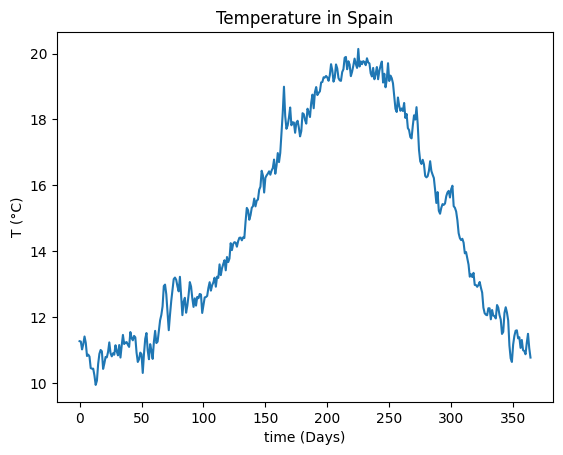

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

X,_= fetch_aemet(return_X_y=True,as_frame=True)

selected_column = X[X.columns[0]]

numeric_values = selected_column.values

data_values=numeric_values.data_matrix[:,:,0] #Contains 73 tempartures plots

courb_un=data_values[0]
#courb_deux=data_values[:]
plt.figure()
plt.title("Temperature in Spain")
plt.xlabel("time (Days)")
plt.ylabel("T (°C)")
plt.plot(courb_un)
#plt.plot(courb_deux)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


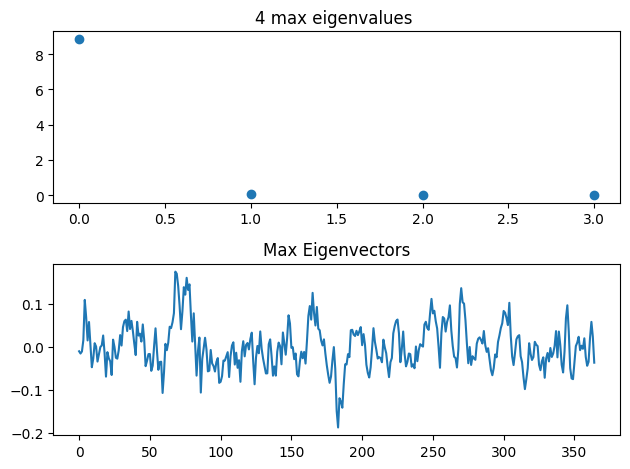

In [ ]:
#Processing the data according to extreme value theory
def norme(L):
  return np.linalg.norm(L,ord=2)
Norme_2=[norme(L) for L in data_values]
theta=[data_values[k]/Norme_2[k] for k in range(len(data_values))]
theta_sorted = [y for _, y in sorted(zip(Norme_2, theta), key=lambda pair: pair[0])]
#Centering the data
centered_theta=[lst-np.mean(lst) for lst in theta_sorted]

assert all(len(liste)==365 for liste in centered_theta)
matrice=np.array(centered_theta)
operateur=np.transpose(matrice)@matrice
#Diagonalisation of the covariance operator:
L=np.linalg.eig(operateur)
eigenvalues, eigenvectors = L
real_eigval=L[0].real
for_biggest=sorted(list(real_eigval), reverse=True)[:4]
INDEX=np.argsort(for_biggest)
max_eigenvectors=eigenvectors[:,INDEX[0]]
#Plot section
fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1)
ax1.set_title("4 max eigenvalues ")
ax1.scatter(range(len(for_biggest)),for_biggest, marker='o')
ax2.plot(max_eigenvectors)
ax2.set_title("Max Eigenvectors")
plt.tight_layout()

Here we illustrate numerically the notion of regular variation for a stochastic process in $L^{2}[0,1]$. The regular variation is a fundamental hypothesis regarding extreme learning.

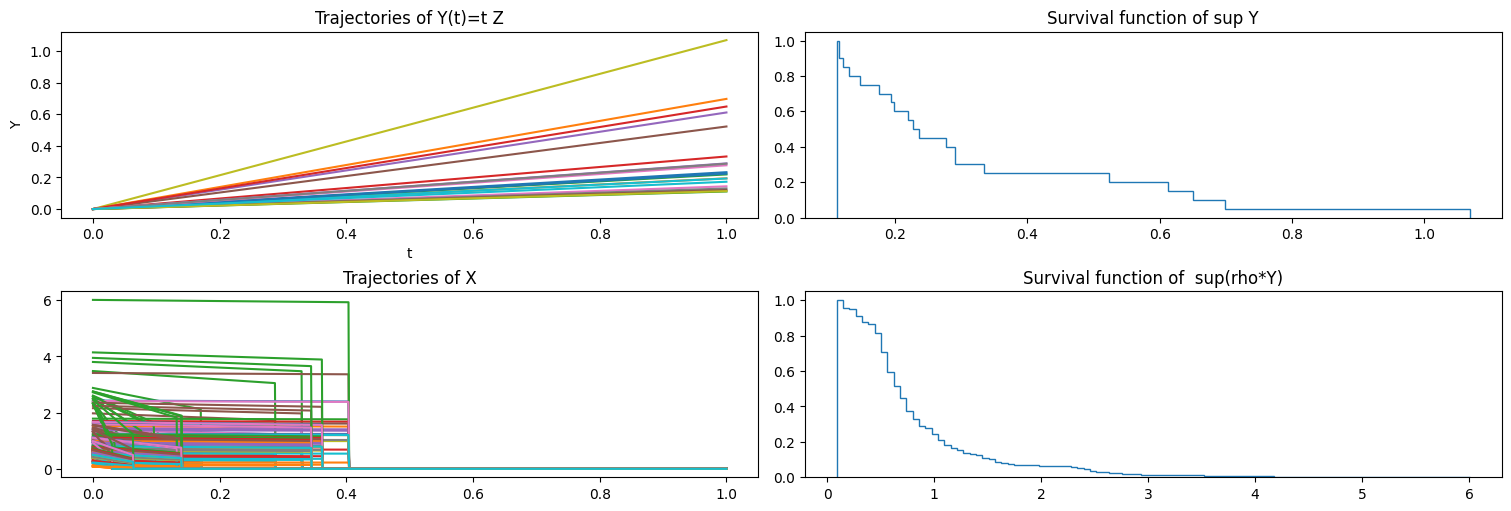

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
alpha_Z = 6  # Paramètre αZ > 0
n_samples = 100  # Numbers of samples

# Sampling
pareto_samples = np.random.pareto(alpha_Z, n_samples)
expZ=[np.exp(x) for x in pareto_samples]
# Définition of Y(t)
def Y(t, z):
    return (1 - t / (3 * z**2) * np.exp(-2 * z)) * np.exp(z) * (t >= 0 and t <= 3 * z**2 * np.exp(-2 * z))
alpha_rho=alpha_Z/2
pareto_samples_rho = np.random.pareto(alpha_rho, n_samples)
def X(t,z,rho):
  return rho*Y(t,z)


t_values = np.linspace(0, 1, 1000)
norme_sup=[]
sup=[]
N=[]
fig, axs = plt.subplots(2, 2, figsize=(15, 5),layout='constrained')
plt.figure()

Par=pareto_samples[:20]+pareto_samples[-20:] #makes the plot clear
Par_rho=pareto_samples_rho[:20]+pareto_samples_rho[-20:] #makes the plot clear
for z in Par:
    y_values=[t*z for t in t_values]
    #y_values = [Y(t, z) for t in t_values]
    #norme_sup.append(np.max(y_values))
    norme_sup.append(np.max(y_values))
    # plot Y(t)
    axs[0,0].plot(t_values, y_values)

    for rho in Par_rho:
        sup.append(np.max([X(t, z, rho) for t in t_values]))
        x_values=[rho*Y(t,z) for t in t_values]
        #N.append(rho*z)  a supprimer ?
        axs[1,0].plot(t_values,x_values)



axs[0,0].set_title("Trajectories of Y(t)=t Z")
axs[0,0].set_xlabel("t")
axs[0,0].set_ylabel("Y")

axs[0, 1].hist(norme_sup,bins=300, density=True, histtype='step', cumulative=-1)
axs[0, 1].set_title("Survival function of sup Y")

axs[1,0].set_title("Trajectories of X")

axs[1,1].hist(sup,bins=100, density=True, histtype='step', cumulative=-1)
#axs[1,1].plot(values[:], probabilities)
axs[1,1].set_title("Survival function of  sup(rho*Y)")

plt.tight_layout()
#axs[1,0].hist(X)
#axs[1, 0].set_title("Histogramme of norme_sup")
#axs[1,0].set_xlabel("k")
#axs[1, 0].set_ylabel("Sup(Y(t))_{k)")
plt.show()



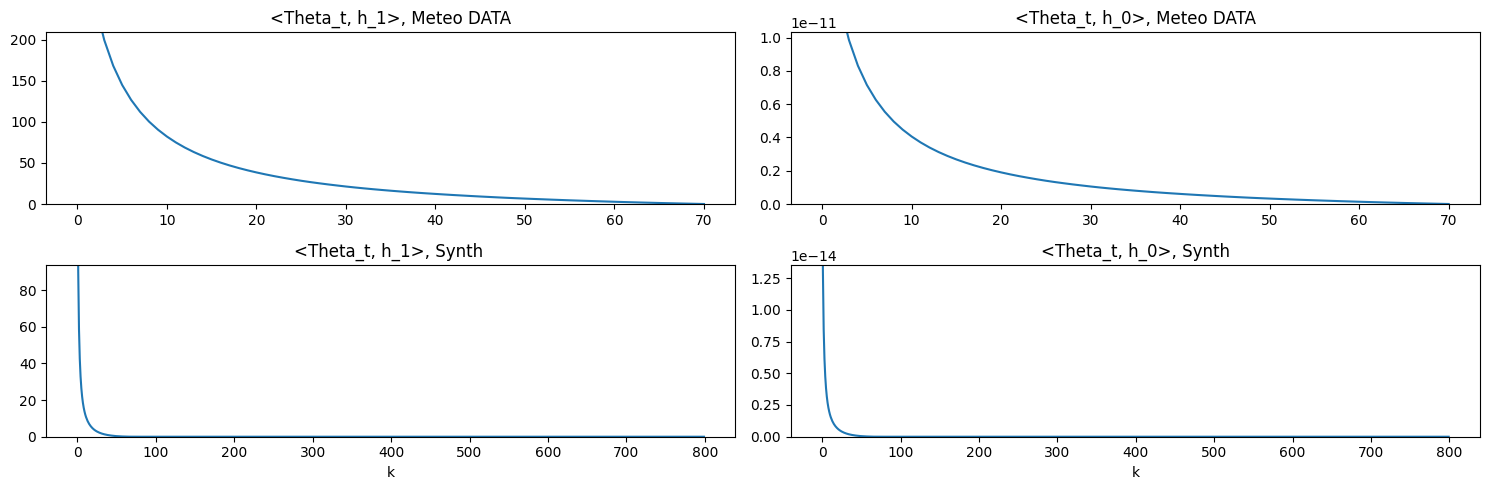

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alpha_Z = 4
n_samples = 800
pareto_samples = np.random.pareto(alpha_Z, n_samples)

def h_un(x):
    return 1

# Def of  X(t)
def X(t, z):
    return 10*t * z

t_values = np.linspace(0,1)
#fig, axs = plt.subplots(2, 2, figsize=(15, 5), layout='constrained')
#n_values=np.arange(0,1,1000)
#Par = pareto_samples[:20] + pareto_samples[-20:]  # esthetique
Norme_2 = []
Y = []
Theta_t = []


#Each sample represents a discret version of a function
for z in pareto_samples:
    y_value_un = [X(t, z) for t in t_values]
    Y.append(y_value_un)
    #plt.plot(y_value_un)

#Norme 2
norme_2 = [ z for z in pareto_samples]
# Sort w.r.t to Norme 2
Y_sorted = [y for _, y in sorted(zip(norme_2, Y), key=lambda pair: pair[0])]
Theta = [np.array(lst) for lst in Y_sorted]

#SAME CODE BUT FOR THE DATA-METEO:
def norme(L):
  return np.linalg.norm(L,ord=2)
Norme_2=[norme(L) for L in data_values]
theta=[data_values[k]/Norme_2[k] for k in range(len(data_values))]
theta_sorted = [y for _, y in sorted(zip(Norme_2, theta), key=lambda pair: pair[0])]
#Initialisation synthetic data
l=len(Theta)
S=[]
T=[]
n = len(norme_2)
S = []
T = []
#Initialisation meteo data:
l=len(theta_sorted)
Q=[]
R=[]
N=len(Norme_2)
for k in range(2,N):
  s=0
  t=0
  for j in range(1,l-k):
    s+=(1/(k+1))*np.dot(theta_sorted[j],np.array([np.sin(2*k*np.pi) for k in range(len(theta_sorted[j]))]))
    t+=(1/(k+1))*np.dot(theta_sorted[j],np.array([1 for k in range(len(theta_sorted[j]))]))
  Q.append(np.abs(s))
  R.append(np.abs(t))


for k in range(n):
    s = 0
    t = 0
    for j in range(1, l - k):
        s += np.abs(np.dot(Theta[j], np.array([np.sin(i * np.pi) for i in range(len(Theta[j]))])))
        t += np.abs(np.dot(Theta[j], np.array([1 for i in range(len(Theta[j]))])))
    S.append(np.abs(s/(k+1)))
    T.append(np.abs(t/(k+1)))
fig, axs= plt.subplots(2,2, figsize=(15,5))
axs[0,0].plot(R)
axs[0,0].set_title("<Theta_t, h_1>, Meteo DATA")
axs[0,0].set_ylim(0,max(R)/2)
axs[0, 1].plot(Q)
axs[0, 1].set_title("<Theta_t, h_0>, Meteo DATA")
axs[0,1].set_ylim(0,max(Q)/2)
axs[1, 1].plot(S)
axs[1, 1].set_title("<Theta_t, h_0>, Synth")
axs[1, 1].set_xlabel("k")
axs[1,1].set_ylim(0,max(S)/2)
axs[1, 0].plot(T)
axs[1, 0].set_xlabel("k")
axs[1, 0].set_title("<Theta_t, h_1>, Synth ")
axs[1,0].set_ylim(0,max(T)/2)
plt.tight_layout()